In [2]:
__version__ = '20180810' #Launched version

## Imports and setup
We import all modules required for this notebook

In [119]:
# std. lib
import sys
sys.path.append('../../hypercat')
import warnings
warnings.filterwarnings('ignore')

# 3rd party
import pylab as plt
import numpy as np

# hypercat
import hypercat
import plotting
import ioops

#config... this is only for mac retina users
%config InlineBackend.figure_format = 'retina'

In [120]:
###----------------HDF file dir-------------------###
#hdffile = '/YOUR_HDF_FILEPATH/hypercat_20180417.hdf5'
hdffile = '/Volumes/Kohei_HDD_201803/hypercat/hypercat_20180417.hdf5'

# Exploration of torus parameters with the Hypercat model image

In this notebook we will explore the torus parameters and enjoy how the model images change.

## Obtain the model image
We already introduced how to obtain the model images in differently ways in `hypercatbasics.ipynb`. Please read it first if you have not checked them.

In this notebook, let's load from the `.json` file store in the current dir.

In [121]:
#imgcube = hypercat.ModelCube(hdffile, hypercube='imgdata', subcube_selection='hypercatbasics.json')
imgcube = hypercat.ModelCube(hdffile, hypercube='imgdata', subcube_selection='exploretorus.json')

Opening HDF5 file: /Volumes/Kohei_HDD_201803/hypercat/hypercat_20180417.hdf5 
Loading sampling parameters.
Closing HDF5 file.
Loading objects from file exploretorus.json.
Loading hyperslab [shape: (3,6,1,2,3,6,13,121,241)] from hypercube 'imgdata' [shape: (5,10,16,12,5,7,19,121,241)] to RAM (937.09 MB required) ...
Done.
Squeezing all dim-1 axes...
Instantiating n-dim interpolation object ...
Done.
Inspect the loaded hypercube with .print_sampling()

-------------------------------------------------------
Parameter  Range                Nvalues  Sampled values
-------------------------------------------------------
 sig*    [ 15.000 -  75.000]  (  3)    15.000, 45.000, 75.000
   i*    [  0.000 -  90.000]  (  6)     0.000, 20.000, 40.000, 60.000, 80.000, 90.000
   Y     [ 20.000 -  20.000]  (  1)    20.000
   N*    [  5.000 -  10.000]  (  2)     5.000, 10.000
   q*    [  0.500 -   1.500]  (  3)     0.500,  1.000,  1.500
  tv*    [ 20.000 - 160.000]  (  6)    20.000, 40.000, 60.000, 80.0

## Inclination angle (i)

In [122]:
i = np.arange(10) * 10
vec = (45,i, 10, 1.0, 40, wave) #sig, i, N, q, tv, wave

In [123]:
img = imgcube(vec)
img.shape

(10, 241, 241)

In [124]:
images = [img[j,...] for j in range(10)]

Plotting panel (0,0)
Plotting panel (0,1)
Plotting panel (0,2)
Plotting panel (0,3)
Plotting panel (0,4)
Plotting panel (0,0)
Plotting panel (0,1)
Plotting panel (0,2)
Plotting panel (0,3)
Plotting panel (0,4)


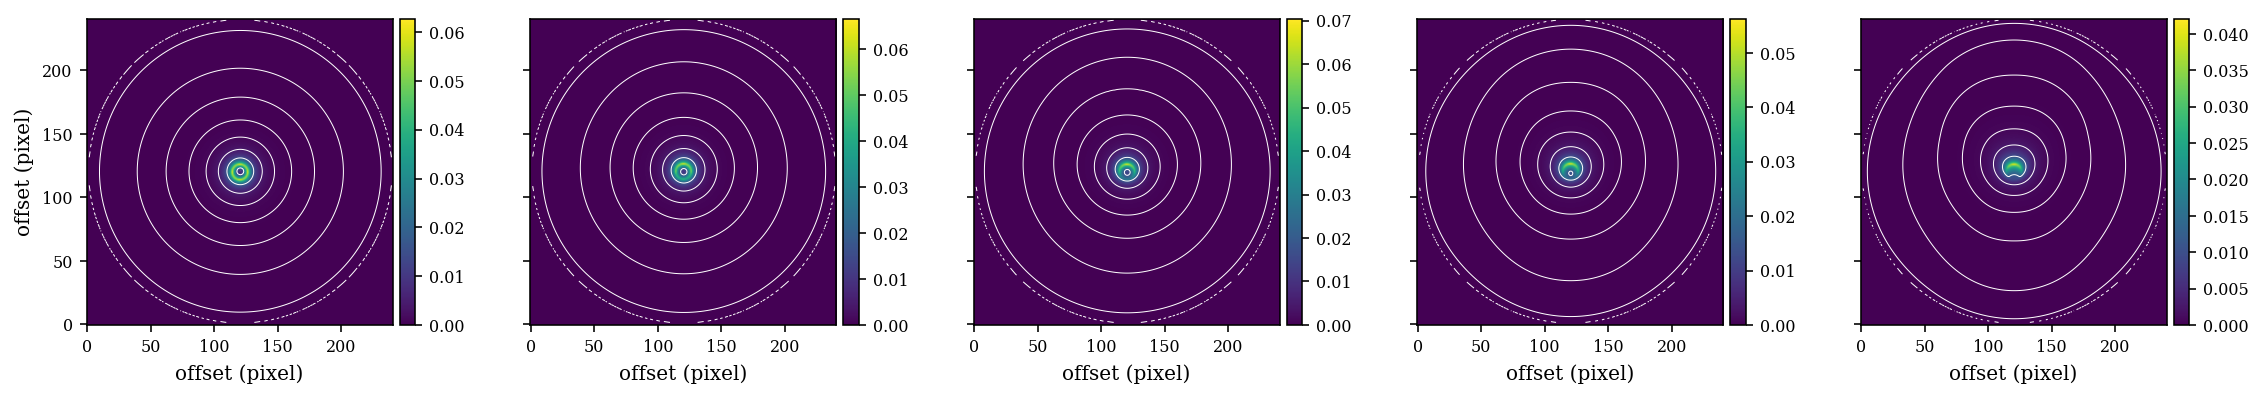

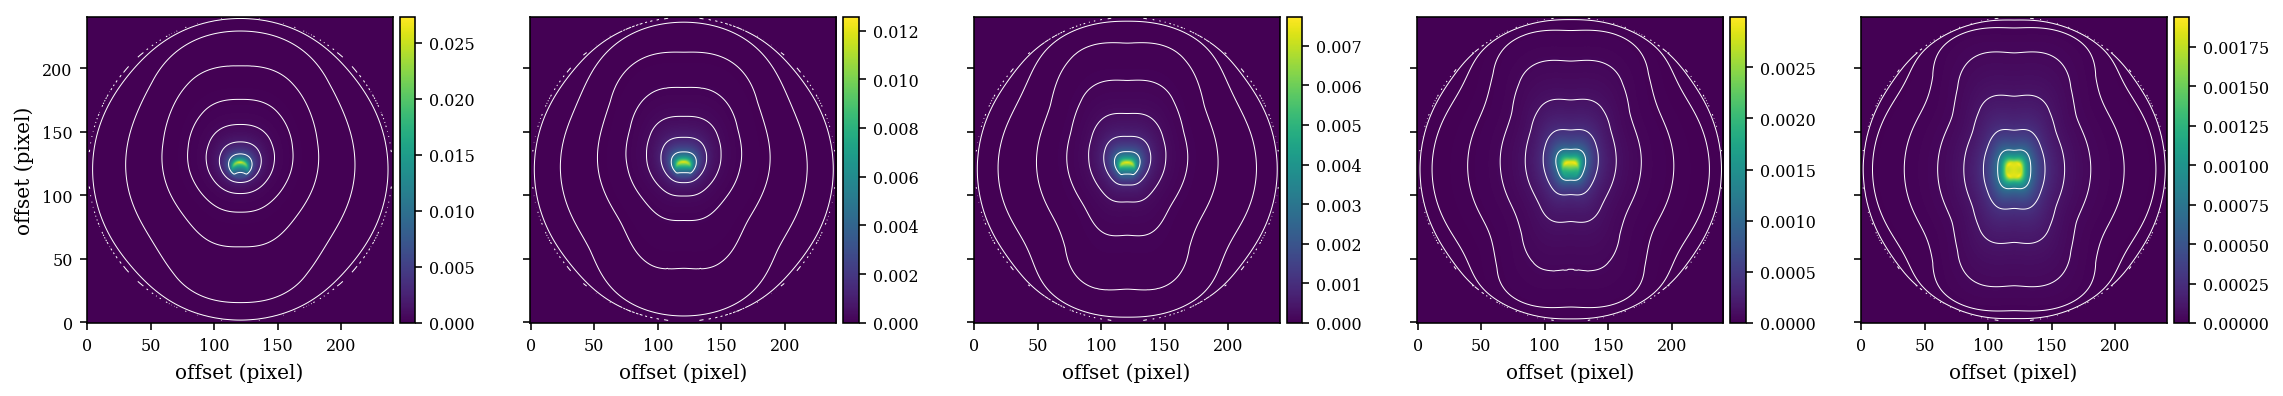

In [125]:
plotting.multiplot(images[:5], contours='log');
plotting.multiplot(images[5:10], contours='log');

We see some polar-elongated shape at $i>40^{\circ}$.

## wavelength dependence (and)

Let's then stick to the edge-on view, and see how the shape changes.

In [126]:
imgcube.wave_

array([ 1.2,  2.2,  3.5,  4.8,  8.7,  9.3,  9.8, 10. , 10.3, 10.6, 11.3,
       11.6, 12. ])

In [135]:
#wave= (1.2, 2.2, 3.5, 4.8, 8.7,)
vec = (45, 90, 10, 1.0, 40, imgcube.wave_) #sig, i, N, q, tv, wave

In [136]:
img = imgcube(vec)

In [137]:
images= [ img[j,...] for j in range(13)]

Plotting panel (0,0)
Plotting panel (0,1)
Plotting panel (0,2)
Plotting panel (0,3)
Plotting panel (0,4)
Plotting panel (0,5)
Plotting panel (0,6)
Plotting panel (0,7)
Plotting panel (0,8)
Plotting panel (0,9)
Plotting panel (0,10)
Plotting panel (0,11)


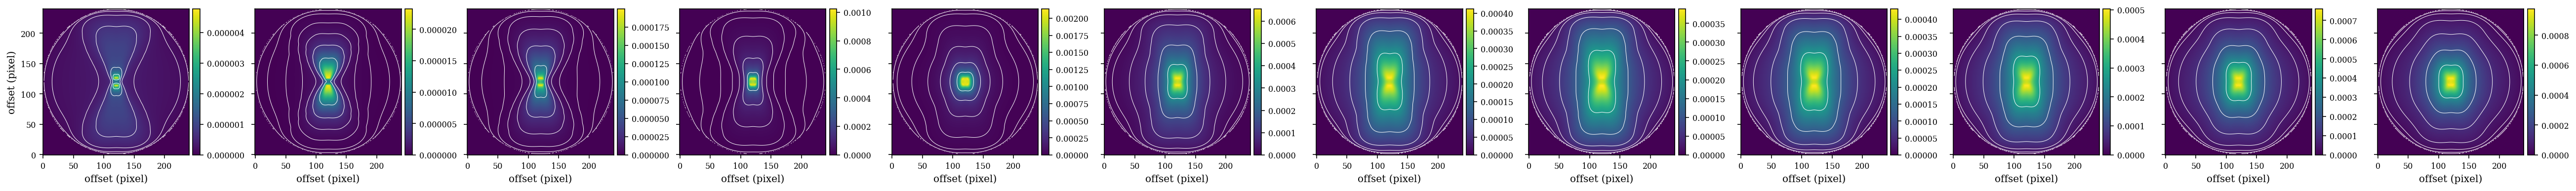

In [138]:
plotting.multiplot(images[:12], contours='log');
#plotting.multiplot(images[6:12], contours='log');

Interestingly, the aspect ratio is always larger than 1 in polar direction.

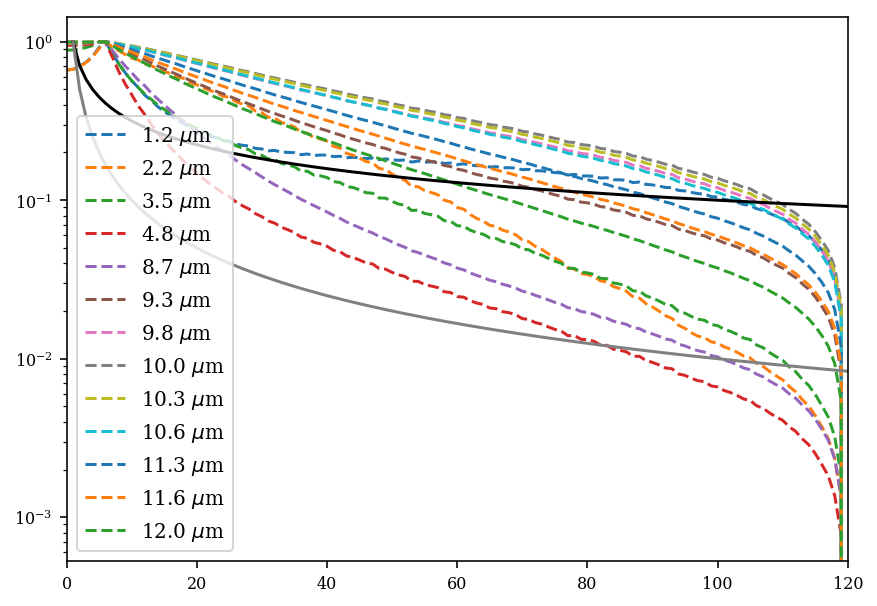

In [209]:
fig, ax= plt.subplots(1,1, figsize=(7,5))

cpix2p2=images[0].shape[0]//2
img2p2RP=imageops.radial_profile(images[0],(cpix2p2, cpix2p2))
img2p2RPnorm=img2p2RP/img2p2RP.max()

for i in range(len(images)):
    cpix=images[i].shape[0]//2
    imgRP=imageops.radial_profile(images[i],(cpix,cpix))
    imgRPnorm=imgRP/imgRP.max()
    #ax.plot(imgRPnorm/img2p2RPnorm, label=np.str(imgcube.wave_[i])+r' $\mu$m')
    ax.plot(imgRPnorm, '--', label=np.str(imgcube.wave_[i])+r' $\mu$m')
    

xval=np.arange(len(imgRP))
ax.plot(xval, xval**(-0.5), color='black')
ax.plot(xval, xval**(-1.0), color='gray')


ax.set_xlim([0,120])
ax.set_yscale('log')
ax.legend()

In [210]:
np.sum(img2p2RP[0:10])
len(img2p2RP)

img2p2Rsum=[]
for i in range(len(img2p2RP)):
    img2p2Rsum.append(np.sum(img2p2RP[0:i]))

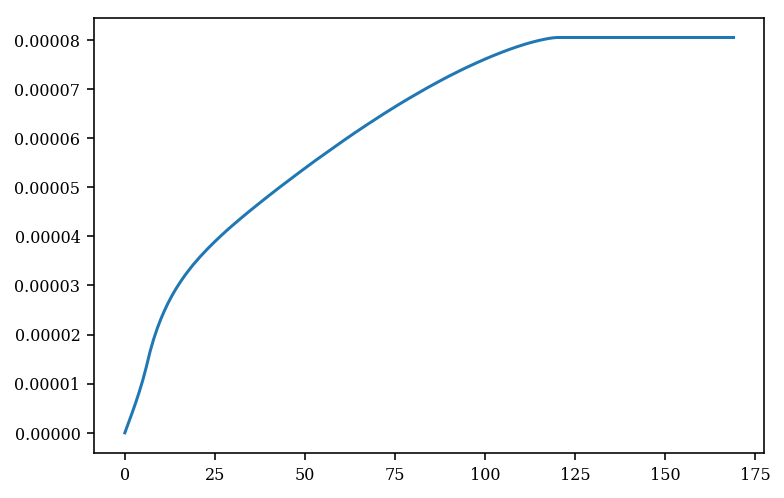

In [186]:
plt.plot(img2p2Rsum)